--2025-04-11 12:13:41--  https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx
Resolving huggingface.co (huggingface.co)... 18.160.143.32, 18.160.143.76, 18.160.143.75, ...
Connecting to huggingface.co (huggingface.co)|18.160.143.32|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/40/3c/403ce23d3f5c02a28fcbe749205d5c8245b2812e6c948bae7abac24495779bc7/e4a3f08c753cb72d04e10aa0f7dbe3deebbf39567d4ead6dce08e98aa49e16af?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27inswapper_128.onnx%3B+filename%3D%22inswapper_128.onnx%22%3B&Expires=1744377222&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDM3NzIyMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy80MC8zYy80MDNjZTIzZDNmNWMwMmEyOGZjYmU3NDkyMDVkNWM4MjQ1YjI4MTJlNmM5NDhiYWU3YWJhYzI0NDk1Nzc5YmM3L2U0YTNmMDhjNzUzY2I3MmQwNGUxMGFhMGY3ZGJlM2RlZWJiZjM5NTY3ZDRlYWQ2ZGNlMDhlOThhYTQ5ZTE2YWY%7EcmVzcG9uc2Ut

Saving 12.jpg to 12 (1).jpg
Now upload the target image (the face you want to replace):


Saving 223.webp to 223 (2).webp
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set d

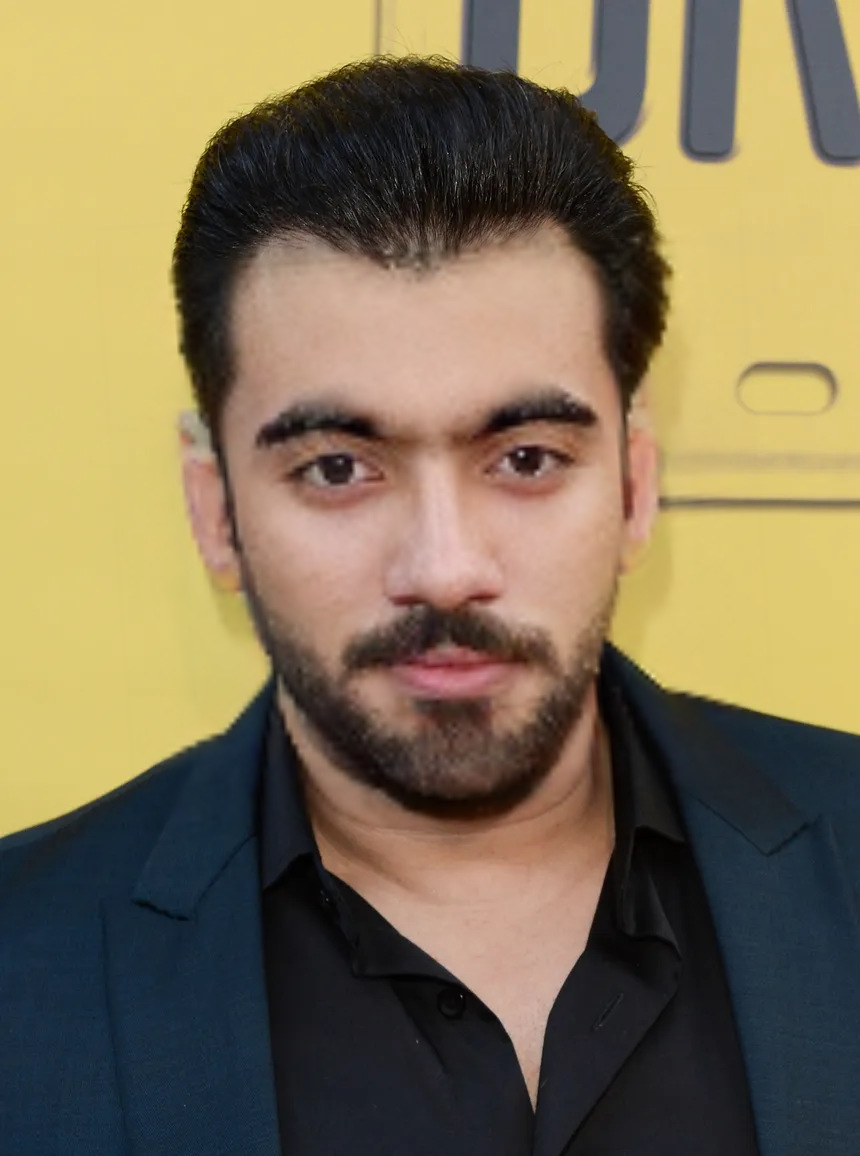

In [71]:
# image Generation

# Install required libraries
!pip install insightface onnxruntime opencv-python numpy pillow

import cv2
import numpy as np
from insightface.app import FaceAnalysis
from insightface.model_zoo import get_model
from google.colab import files
import os
from PIL import Image

# Set up directories
os.makedirs('input_images', exist_ok=True)
os.makedirs('output', exist_ok=True)
os.makedirs('models', exist_ok=True)

# Download the inswapper_128.onnx model automatically from Hugging Face
model_url = "https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx"
model_path = 'models/inswapper_128.onnx'
print("Downloading inswapper_128.onnx model...")
!wget {model_url} -O {model_path}
print("Model downloaded successfully.")

# Upload the source image
print("Please upload the source image (the face you want to swap):")
uploaded_source = files.upload()

# Upload the target image
print("Now upload the target image (the face you want to replace):")
uploaded_target = files.upload()

# Ensure exactly one image is uploaded for each
if len(uploaded_source) != 1 or len(uploaded_target) != 1:
    raise ValueError("Please upload exactly one source image and one target image.")

# Save uploaded images
source_filename = list(uploaded_source.keys())[0]
target_filename = list(uploaded_target.keys())[0]

source_path = f'input_images/{source_filename}'
target_path = f'input_images/{target_filename}'

with open(source_path, 'wb') as f:
    f.write(uploaded_source[source_filename])
with open(target_path, 'wb') as f:
    f.write(uploaded_target[target_filename])

# Load FaceAnalysis model for face detection
app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# Load the face swapper model
swapper = get_model(model_path, providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

# Function to load an image
def load_image(image_path):
    return cv2.imread(image_path)

# Function to swap faces
def swap_faces(source_img_path, target_img_path, output_path):
    # Load images
    source_img = load_image(source_img_path)
    target_img = load_image(target_img_path)

    # Detect faces
    source_faces = app.get(source_img)
    target_faces = app.get(target_img)

    if len(source_faces) == 0 or len(target_faces) == 0:
        raise ValueError("No faces detected in one or both images.")

    # Take the first detected face from each image
    source_face = source_faces[0]
    target_face = target_faces[0]

    # Perform face swap
    swapped_img = swapper.get(target_img, target_face, source_face, paste_back=True)

    # Save the result
    cv2.imwrite(output_path, swapped_img)
    print(f"Face-swapped image saved as {output_path}")

# Perform face swap
output_path = 'output/swapped_image.png'
swap_faces(source_path, target_path, output_path)

# Display the result
from IPython.display import Image as IPImage
IPImage(output_path)



Saving fake_#.png to fake_#.png
User uploaded file: fake_#.png
--2025-04-11 11:14:19--  https://huggingface.co/prithivMLmods/Deep-Fake-Detector-Model-ONNX/resolve/main/onnx/model.onnx
Resolving huggingface.co (huggingface.co)... 18.160.143.76, 18.160.143.99, 18.160.143.32, ...
Connecting to huggingface.co (huggingface.co)|18.160.143.76|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/de/98/de981173be15bfc41bcc640a4b47347156011223ee4ca85b02c7375cd66246d6/5cc1e5f122b3c855ab0578ec470e1dec992fb5e260989132f3b7678417382a88?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.onnx%3B+filename%3D%22model.onnx%22%3B&Expires=1744373660&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDM3MzY2MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2RlLzk4L2RlOTgxMTczYmUxNWJmYzQxYmNjNjQwYTRiNDczNDcxNTYwMTEyMjNlZTRjYTg1YjAyYzczNzVjZDY2MjQ2ZDYvNWNjMWU1ZjEyMmIzYzg1NWFiMDU3O

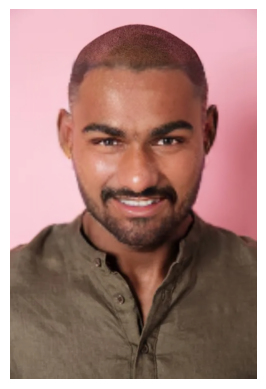

In [56]:
import numpy as np
import onnxruntime as ort
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Function to load the deepfake detector model (XceptionNet in ONNX format)
def load_deepfake_model(model_path):
    session = ort.InferenceSession(model_path)
    return session

# Preprocessing function for input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to fit the model's input
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img = np.transpose(img, (2, 0, 1))  # Convert to CxHxW
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify image based on deepfake detection model
def classify_image(model, image_path):
    input_tensor = preprocess_image(image_path)
    input_name = model.get_inputs()[0].name
    output = model.run(None, {input_name: input_tensor})[0]

    # Output probabilities for real/fake
    prob_real = output[0][0]  # Class 0 = Real
    prob_fake = output[0][1]  # Class 1 = Fake

    print(f"Real: {prob_real:.4f}, Fake: {prob_fake:.4f}")

    # Invert logic if the model considers higher "real" as "fake" and vice versa
    if prob_fake > prob_real:
        return "⚠️ Likely Fake"
    else:
        return "✅ Likely Real"

# Main function to analyze image and classify
def analyze_image(image_path, model):
    print("Classifying Image...")

    result = classify_image(model, image_path)

    print(f"\n{result}")

    # Display the image
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")

    # Path to the uploaded image
    image_path = filename

    # Load pre-trained deepfake detection model
    model_url = "https://huggingface.co/prithivMLmods/Deep-Fake-Detector-Model-ONNX/resolve/main/onnx/model.onnx"
    model_path = "/content/deepfake_detector.onnx"

    # Download the model
    !wget {model_url} -O {model_path}
    print("Model downloaded successfully.")

    # Load the deepfake detection model
    model = load_deepfake_model(model_path)

    # Analyze the image
    analyze_image(image_path, model)


Saving salu padukon.png to salu padukon (4).png
User uploaded file: salu padukon (4).png
Analyzing Metadata...
No Metadata Found.

Performing Error Level Analysis...


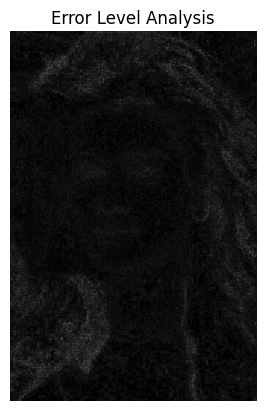


✅ Likely Real


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from google.colab import files

# Function to extract image metadata
def extract_metadata(image_path):
    from PIL import ExifTags
    image = Image.open(image_path)
    metadata = {}
    if hasattr(image, '_getexif'):
        exif_data = image._getexif()
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = ExifTags.TAGS.get(tag, tag)
                metadata[tag_name] = value
    return metadata

# Function to perform Error Level Analysis (ELA)
def apply_ela(image_path, quality=90):
    original_image = Image.open(image_path)
    ela_image_path = '/content/ela_image.jpg'  # Save it to a temporary location
    original_image.save(ela_image_path, 'JPEG', quality=quality)
    ela_image = Image.open(ela_image_path)
    diff_image = ImageChops.difference(original_image.convert('RGB'), ela_image.convert('RGB'))
    diff_image = diff_image.convert('L')
    diff_image = np.array(diff_image)
    return diff_image

# Function to classify image based on ELA results
def classify_image(ela_result):
    # Calculate mean brightness of the ELA result
    mean_brightness = np.mean(ela_result)

    # Define a threshold for classification
    if mean_brightness > 10:  # This threshold can be adjusted based on experimentation
        return "⚠️ Likely Fake"
    else:
        return "✅ Likely Real"

# Main function to analyze image
def analyze_image(image_path):
    print("Analyzing Metadata...")
    metadata = extract_metadata(image_path)
    if metadata:
        print("Metadata Found:")
        for tag, value in metadata.items():
            print(f"{tag}: {value}")
    else:
        print("No Metadata Found.")

    print("\nPerforming Error Level Analysis...")
    ela_result = apply_ela(image_path, quality=90)

    # Display the ELA result
    plt.imshow(ela_result, cmap='gray')
    plt.title('Error Level Analysis')
    plt.axis('off')
    plt.show()

    # Classify the image based on the ELA result
    result = classify_image(ela_result)
    print(f"\n{result}")

# Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")
    analyze_image(filename)



Saving fake_#.png to fake_# (2).png
User uploaded file: fake_# (2).png
--2025-04-11 11:19:21--  https://huggingface.co/prithivMLmods/Deep-Fake-Detector-Model-ONNX/resolve/main/onnx/model.onnx
Resolving huggingface.co (huggingface.co)... 18.160.143.76, 18.160.143.99, 18.160.143.32, ...
Connecting to huggingface.co (huggingface.co)|18.160.143.76|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/de/98/de981173be15bfc41bcc640a4b47347156011223ee4ca85b02c7375cd66246d6/5cc1e5f122b3c855ab0578ec470e1dec992fb5e260989132f3b7678417382a88?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.onnx%3B+filename%3D%22model.onnx%22%3B&Expires=1744373894&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0NDM3Mzg5NH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2RlLzk4L2RlOTgxMTczYmUxNWJmYzQxYmNjNjQwYTRiNDczNDcxNTYwMTEyMjNlZTRjYTg1YjAyYzczNzVjZDY2MjQ2ZDYvNWNjMWU1ZjEyMmIzYzg1N

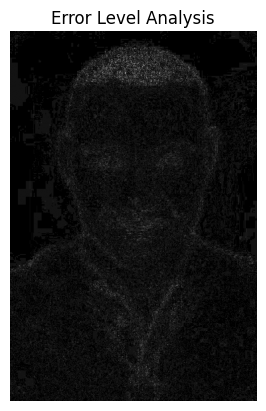


ELA Classification: ✅ Likely Real

✅ The image is likely real based on deepfake detection and ELA.


In [59]:
import numpy as np
import onnxruntime as ort
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from google.colab import files

# Function to load the deepfake detector model (XceptionNet in ONNX format)
def load_deepfake_model(model_path):
    session = ort.InferenceSession(model_path)
    return session

# Preprocessing function for input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))  # Resize to fit the model's input
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img = np.transpose(img, (2, 0, 1))  # Convert to CxHxW
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to classify image based on deepfake detection model
def classify_image(model, image_path):
    input_tensor = preprocess_image(image_path)
    input_name = model.get_inputs()[0].name
    output = model.run(None, {input_name: input_tensor})[0]

    # Output probabilities for real/fake
    prob_real = output[0][0]  # Class 0 = Real
    prob_fake = output[0][1]  # Class 1 = Fake

    print(f"Real: {prob_real:.4f}, Fake: {prob_fake:.4f}")

    # Adjusting the threshold for better decision-making (e.g., 0.5 is a common threshold)
    threshold = 0.6  # You can fine-tune this threshold value
    if prob_fake > threshold:
        return "⚠️ Likely Fake"
    elif prob_real > threshold:
        return "✅ Likely Real"
    else:
        return "⚠️ Uncertain, check further analysis."

# Function to extract image metadata (EXIF)
def extract_metadata(image_path):
    from PIL import ExifTags
    image = Image.open(image_path)
    metadata = {}
    if hasattr(image, '_getexif'):
        exif_data = image._getexif()
        if exif_data:
            for tag, value in exif_data.items():
                tag_name = ExifTags.TAGS.get(tag, tag)
                metadata[tag_name] = value
    return metadata

# Function to perform Error Level Analysis (ELA)
def apply_ela(image_path, quality=90):
    original_image = Image.open(image_path)
    ela_image_path = '/content/ela_image.jpg'  # Save it to a temporary location
    original_image.save(ela_image_path, 'JPEG', quality=quality)
    ela_image = Image.open(ela_image_path)
    diff_image = ImageChops.difference(original_image.convert('RGB'), ela_image.convert('RGB'))
    diff_image = diff_image.convert('L')
    diff_image = np.array(diff_image)
    return diff_image

# Function to classify image based on ELA results
def classify_ela_image(ela_result):
    # Calculate mean brightness of the ELA result
    mean_brightness = np.mean(ela_result)

    # Fine-tune this threshold based on testing (threshold of 10 might be too low or high)
    threshold = 15  # Adjust this threshold based on testing
    if mean_brightness > threshold:
        return "⚠️ Likely Fake"
    else:
        return "✅ Likely Real"

# Main function to analyze image, deepfake detection and ELA
def analyze_image(image_path, model):
    print("Classifying Image based on Deepfake Detection...")
    # Classify using deepfake detection
    deepfake_result = classify_image(model, image_path)
    print(f"\n{deepfake_result}")

    # Perform Error Level Analysis (ELA)
    print("\nPerforming Error Level Analysis...")
    ela_result = apply_ela(image_path, quality=90)

    # Display the ELA result
    plt.imshow(ela_result, cmap='gray')
    plt.title('Error Level Analysis')
    plt.axis('off')
    plt.show()

    # Classify based on ELA result
    ela_classification = classify_ela_image(ela_result)
    print(f"\nELA Classification: {ela_classification}")

    # Show the final decision
    if deepfake_result == "⚠️ Likely Fake" or ela_classification == "⚠️ Likely Fake":
        print("\n⚠️ The image is likely a fake based on deepfake detection or ELA.")
    else:
        print("\n✅ The image is likely real based on deepfake detection and ELA.")

# Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")

    # Path to the uploaded image
    image_path = filename

    # Load pre-trained deepfake detection model
    model_url = "https://huggingface.co/prithivMLmods/Deep-Fake-Detector-Model-ONNX/resolve/main/onnx/model.onnx"
    model_path = "/content/deepfake_detector.onnx"

    # Download the model
    !wget {model_url} -O {model_path}
    print("Model downloaded successfully.")

    # Load the deepfake detection model
    model = load_deepfake_model(model_path)

    # Analyze the image
    analyze_image(image_path, model)


In [2]:
!pip install Pillow
import torch
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Function to load the pre-trained deepfake detection model from HuggingFace
def load_deepfake_model():
    # Load model and feature extractor from Hugging Face
    model_name = "facebook/dino-vitb16"
    model = AutoModelForImageClassification.from_pretrained(model_name)
    feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
    return model, feature_extractor

# Preprocessing function for input image
def preprocess_image(image_path, feature_extractor):
    img = Image.open(image_path)
    img = img.convert("RGB")  # Convert to RGB in case it's not already
    img = feature_extractor(images=img, return_tensors="pt")  # Preprocess image
    return img

# Function to classify the image using the deepfake model
def classify_image(model, image_path, feature_extractor):
    # Preprocess the image
    img = preprocess_image(image_path, feature_extractor)

    # Forward pass the image through the model
    with torch.no_grad():
        outputs = model(**img)

    # Get the predicted class (0 for real, 1 for fake)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=1).item()

    # Print and return result
    if prediction == 0:
        return "✅ Likely Real"
    else:
        return "⚠️ Likely Fake"

# Function to perform Error Level Analysis (ELA)
def apply_ela(image_path, quality=90):
    original_image = Image.open(image_path)
    ela_image_path = '/content/ela_image.jpg'  # Save it to a temporary location
    original_image.save(ela_image_path, 'JPEG', quality=quality)
    ela_image = Image.open(ela_image_path)
    diff_image = ImageChops.difference(original_image.convert('RGB'), ela_image.convert('RGB'))
    diff_image = diff_image.convert('L')
    diff_image = np.array(diff_image)
    return diff_image

# Function to classify image based on ELA results
def classify_ela_image(ela_result):
    # Calculate mean brightness of the ELA result
    mean_brightness = np.mean(ela_result)

    # Fine-tune this threshold based on testing (threshold of 10 might be too low or high)
    threshold = 15  # Adjust this threshold based on testing
    if mean_brightness > threshold:
        return "⚠️ Likely Fake"
    else:
        return "✅ Likely Real"

# Main function to analyze image, deepfake detection, and ELA
def analyze_image(image_path, model, feature_extractor):
    print("Classifying Image based on Deepfake Detection...")
    # Classify using deepfake detection
    deepfake_result = classify_image(model, image_path, feature_extractor)
    print(f"\n{deepfake_result}")

    # Perform Error Level Analysis (ELA)
    print("\nPerforming Error Level Analysis...")
    ela_result = apply_ela(image_path, quality=90)

    # Display the ELA result
    plt.imshow(ela_result, cmap='gray')
    plt.title('Error Level Analysis')
    plt.axis('off')
    plt.show()

    # Classify based on ELA result
    ela_classification = classify_ela_image(ela_result)
    print(f"\nELA Classification: {ela_classification}")

    # Show the final decision
    if deepfake_result == "⚠️ Likely Fake" or ela_classification == "⚠️ Likely Fake":
        print("\n⚠️ The image is likely a fake based on deepfake detection or ELA.")
    else:
        print("\n✅ The image is likely real based on deepfake detection and ELA.")

# Upload an image
uploaded = files.upload()
for filename in uploaded.keys():
    print(f"User uploaded file: {filename}")

    # Path to the uploaded image
    image_path = filename

    # Load pre-trained deepfake detection model from Hugging Face
    model, feature_extractor = load_deepfake_model()

    # Analyze the image
    analyze_image(image_path, model, feature_extractor)


Saving fake_1.png to fake_1 (1).png
User uploaded file: fake_1 (1).png


Some weights of ViTForImageClassification were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Classifying Image based on Deepfake Detection...

✅ Likely Real

Performing Error Level Analysis...


NameError: name 'ImageChops' is not defined

Saving salu padukon.jpg to salu padukon (3).jpg

🔍 Prediction: Real


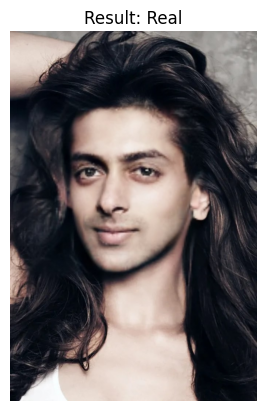

In [20]:
# Install required libraries
!pip install -q transformers torch torchvision matplotlib Pillow

# Import necessary libraries
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load Hugging Face model and processor
model_name = "prithivMLmods/Deepfake-Detection-Exp-02-22"
processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Preprocess the image
image = Image.open(image_path).convert("RGB")
inputs = processor(images=image, return_tensors="pt")

# Perform inference
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = torch.argmax(logits, dim=1).item()

# Interpret the result
labels = model.config.id2label
predicted_label = labels[predicted_class_idx]
print(f"\n🔍 Prediction: {predicted_label}")

# Display the image
plt.imshow(image)
plt.axis('off')
plt.title(f"Result: {predicted_label}")
plt.show()
